In [1]:
# Setup Reveal.JS
from traitlets.config.manager import BaseJSONConfigManager
from pathlib import Path
path = Path.home() / ".jupyter" / "nbconfig"
cm = BaseJSONConfigManager(config_dir=str(path))
# ipyleaflet hack to load full map in Reveal.js
# These settings are also injected into the notebook metadata
# (Edit -> Edit Notebook Metadata), which is the preferred method
cm.update(
    "rise",
    {"minScale": 1.25,
     "width": "80%"}
)

{'minScale': 1.25, 'width': '80%'}

# Computer says "I Don't Know"
## The case for Honest AI

Peter Flach, University of Bristol and Alan Turing Institute, UK

`Peter.Flach@bristol.ac.uk`

Would you consider it newsworthy if a human passes a multiple-choice test? Probably not. 

Yet multiple-choice tests are behind many AI successes reported in the media, leading to recent headlines such as 
- "researchers taught an AI to recognize smells", <!-- .element: class="fragment" -->
- "AI Trained on Old Scientific Papers Makes Discoveries Humans Missed", <!-- .element: class="fragment" -->
- "AI learns to recognize nerve cells", <!-- .element: class="fragment" -->
- and so on. <!-- .element: class="fragment" -->

We are then told that "AI passed the test" or "the algorithm worked" -- but what exactly does that mean? **What is the passing grade, and who sets it?**

In this talk I will discuss why performance evaluation is not something that can be easily summarised in a catchy headline -- neither for humans nor for machines. Furthermore, I will argue why it is imperative that AI algorithms become more *honest* about their own abilities. 

- Quantifying the uncertainty in their predictions in the same way as weather forecasters do -- saying "the chance of rain is 70%" rather than "it will rain" -- would be a good start. 
- Quantifying the uncertainty in that chance estimate --  am I confident that 70% is close to the right number, or did I just guess that on the basis of the last three days? -- would be even better. 

But what would really demonstrate an AI algorithm's awareness of its own strengths *and* limitations is if it would occasionally say "I don't know" -- something that not many contemporary AI algorithms and machine-learned classifiers do (often leading to problems with "adversarial examples" which are doctored to mislead the algorithm). 

I will discuss in an accessible way how this arises due to a focus on discriminative learning, and how recent research has developed ways to overcome this, allowing AI and machine learning to become more honest and aware of its own limitations.  

In [2]:
%matplotlib inline
import numpy as np

In [3]:
np.random.randint(low=1, high=7, size=15)

array([4, 1, 1, 4, 5, 1, 5, 3, 2, 2, 4, 2, 1, 3, 6])

# Second slide

Example of ipyleaflet showing maps

In [4]:
from ipyleaflet import Map, Marker

In [5]:
center = (52.204793, 360.121558)
m = Map(center=center, zoom=15)
marker = Marker(location=center, draggable=True)
m.add_layer(marker);

Map(center=[52.204793, 360.121558], controls=(ZoomControl(options=['position', 'zoom_in_text', 'zoom_in_title'…

In [43]:
display(m)

Map(bottom=3225.0, center=[42.52069952914966, 1.5380859375000002], controls=(ZoomControl(options=['position', …

## Example of heatmap on top of map

In [44]:
from ipyleaflet import Map, Heatmap
from random import uniform
m = Map(center=(0, 0), zoom=2)

heatmap = Heatmap(
    locations=[[uniform(-80, 80), uniform(-180, 180), uniform(0, 1000)] for i in range(2000)],
    radius=20,
    gradient={0.4: 'blue', 0.6: 'cyan', 0.7: 'lime', 0.8: 'yellow', 1.0: 'red'}
)

m.add_layer(heatmap);
display(m)

Map(center=[0, 0], controls=(ZoomControl(options=['position', 'zoom_in_text', 'zoom_in_title', 'zoom_out_text'…

# Opendata Bristol

Example of OpenData Bristol on top of Bristol's map

In [45]:
air_quality_bristol_query = 'https://opendata.bristol.gov.uk/api/records/1.0/search/?dataset=air-quality-data-continuous&q=&rows=1000&sort=date_time&facet=date_time&facet=coordinates&facet=temp'

import urllib, json

response = urllib.request.urlopen(air_quality_bristol_query)

data = json.loads(response.read())

print('Json root keys')
print(data.keys())
print('3 records')
data['records'][:3]

Json root keys
dict_keys(['nhits', 'parameters', 'records', 'facet_groups'])
3 records


[{'datasetid': 'air-quality-data-continuous',
  'recordid': 'f5b5e409f2ff660cb80d642e58ce31a459a0bc25',
  'fields': {'datestart': '2009-03-13T00:00:00+00:00',
   'date_time': '2021-02-24T17:00:00+00:00',
   'no': 13.561125,
   'geo_point_2d': [51.4780449714, -2.53523027459],
   'current': 'True',
   'nox': 48.481875,
   'location': 'Fishponds Road',
   'siteid': 463,
   'instrumenttype': 'Continuous (Reference)',
   'no2': 27.73125},
  'geometry': {'type': 'Point',
   'coordinates': [-2.53523027459, 51.4780449714]},
  'record_timestamp': '2021-02-24T17:15:17.173000+00:00'},
 {'datasetid': 'air-quality-data-continuous',
  'recordid': 'd951883802e19cc206f927325bc0100f06666b36',
  'fields': {'datestart': '2003-05-23T00:00:00+00:00',
   'date_time': '2021-02-24T17:00:00+00:00',
   'no': 35.97595,
   'geo_point_2d': [51.4278638883, -2.56374153315],
   'current': 'True',
   'nox': 88.309688,
   'location': 'Wells Road',
   'siteid': 270,
   'instrumenttype': 'Continuous (Reference)',
   'no2

In [46]:
def get_records(data, fields=None):
    '''
    data: json object
    fields: list of strings
        Each dictionary entry with the field name is retrieved in the given order
    return
    list of list of values
    '''
    for record in data['records']:
        record_fields = record['fields']
        if fields is None:
            yield record_fields
        else:
            for key in fields:
                yield [record_fields.get(key, np.nan) for key in fields]

fields = ['date_time', 'geo_point_2d', 'temp', 'no', 'no2', 'nox']
                
record_values = list(get_records(data, fields=fields))

record_values[:5]

[['2021-02-24T17:00:00+00:00',
  [51.4780449714, -2.53523027459],
  nan,
  13.561125,
  27.73125,
  48.481875],
 ['2021-02-24T17:00:00+00:00',
  [51.4780449714, -2.53523027459],
  nan,
  13.561125,
  27.73125,
  48.481875],
 ['2021-02-24T17:00:00+00:00',
  [51.4780449714, -2.53523027459],
  nan,
  13.561125,
  27.73125,
  48.481875],
 ['2021-02-24T17:00:00+00:00',
  [51.4780449714, -2.53523027459],
  nan,
  13.561125,
  27.73125,
  48.481875],
 ['2021-02-24T17:00:00+00:00',
  [51.4780449714, -2.53523027459],
  nan,
  13.561125,
  27.73125,
  48.481875]]

In [47]:
m = Map(center=(51.454500, -2.587900), zoom=12)
gradient={0.4: 'blue', 0.6: 'cyan', 0.7: 'lime', 0.8: 'yellow', 1.0: 'red'}

position_id = []

field_map = {field: i for i, field in enumerate(fields)}
heatmap = Heatmap(
    locations=[[values[field_map['geo_point_2d']][0],
                values[field_map['geo_point_2d']][1],
                values[field_map['no']]] for values in record_values],
    radius=20,
    gradient=gradient
)

m.add_layer(heatmap);
display(m)

Map(center=[51.4545, -2.5879], controls=(ZoomControl(options=['position', 'zoom_in_text', 'zoom_in_title', 'zo…

# Pandas dataframe

We will use pandas to analyse the data

In [48]:
import pandas as pd
df_records = pd.DataFrame(record_values, columns=fields)
df_records[['Longitude', 'Latitude']] = pd.DataFrame(df_records['geo_point_2d'].tolist(), index= df_records.index)
df_records = df_records.sort_values(by='date_time')
df_records = df_records.drop_duplicates(subset=['Longitude', 'Latitude'], keep='first')
df_records

,date_time,geo_point_2d,temp,no,no2,nox,Longitude,Latitude
5999,2021-02-18T15:00:00+00:00,"[51.4579497129, -2.58398909033]",NaN,8.232000,25.628000,38.250000,51.457950,-2.583989
5976,2021-02-18T15:00:00+00:00,"[51.432675707, -2.60495665673]",8.091576,26.623450,47.621250,88.500937,51.432676,-2.604957
5982,2021-02-18T15:00:00+00:00,"[51.4278638883, -2.56374153315]",NaN,24.690601,21.611251,59.526563,51.427864,-2.563742
5988,2021-02-18T15:00:00+00:00,"[51.4780449714, -2.53523027459]",NaN,20.949600,41.453437,73.535627,51.478045,-2.535230
5944,2021-02-18T16:00:00+00:00,"[51.4417471802, -2.55995583224]",NaN,11.410050,18.168750,35.668125,51.441747,-2.559956
5952,2021-02-18T16:00:00+00:00,"[51.4552693825, -2.59664882861]",NaN,44.333621,63.699002,131.428067,51.455269,-2.596649
5958,2021-02-18T16:00:00+00:00,"[51.4628294172, -2.58454081635]",NaN,1.871000,7.076000,9.945000,51.462829,-2.584541


# Binary probabilistic classifier

Simulation of a probabilistic classifier with a linear transformation to convert raw values into the interval [0, 1]

In [49]:
df_records = df_records.dropna(subset=['no'])
df_records['no_scaled'] = (df_records['no'] - df_records['no'].min())/(df_records['no'].max() - df_records['no'].min())

In [50]:
locations = df_records[['Longitude', 'Latitude', 'no_scaled']].values
locations = [list(row) for row in locations]

In [51]:
m = Map(center=(51.454500, -2.587900), zoom=12)
gradient={0.0: 'blue', 1.0: 'red'}

heatmap = Heatmap(
    locations=locations,
    radius=40,
    gradient=gradient,
    min_opacity=0.5,
)

m.add_layer(heatmap);
display(m)

Map(center=[51.4545, -2.5879], controls=(ZoomControl(options=['position', 'zoom_in_text', 'zoom_in_title', 'zo…

In [52]:
df_records

,date_time,geo_point_2d,temp,no,no2,nox,Longitude,Latitude,no_scaled
5999,2021-02-18T15:00:00+00:00,"[51.4579497129, -2.58398909033]",NaN,8.232000,25.628000,38.250000,51.457950,-2.583989,0.149802
5976,2021-02-18T15:00:00+00:00,"[51.432675707, -2.60495665673]",8.091576,26.623450,47.621250,88.500937,51.432676,-2.604957,0.582923
5982,2021-02-18T15:00:00+00:00,"[51.4278638883, -2.56374153315]",NaN,24.690601,21.611251,59.526563,51.427864,-2.563742,0.537404
5988,2021-02-18T15:00:00+00:00,"[51.4780449714, -2.53523027459]",NaN,20.949600,41.453437,73.535627,51.478045,-2.535230,0.449303
5944,2021-02-18T16:00:00+00:00,"[51.4417471802, -2.55995583224]",NaN,11.410050,18.168750,35.668125,51.441747,-2.559956,0.224646
5952,2021-02-18T16:00:00+00:00,"[51.4552693825, -2.59664882861]",NaN,44.333621,63.699002,131.428067,51.455269,-2.596649,1.000000
5958,2021-02-18T16:00:00+00:00,"[51.4628294172, -2.58454081635]",NaN,1.871000,7.076000,9.945000,51.462829,-2.584541,0.000000


# Simulate probabilistic linear classifier

We start by a uniform value through all the map.

The points are uniformly distributed across the latitude and longitude at 2 degrees on every direction. Because the equirectangular projection the latitude degrees seem to be more spaced on the poles, and very concentrated near the equator. The longitudinal distribution is not affected on this representation. 

In [53]:
from ipyleaflet import Map, Heatmap
from random import uniform
m = Map(center=(0, 0), zoom=0)


nlon, nlat = (180, 90)
lon = np.linspace(-180, 180, nlon)
lat = np.linspace(-90, 90, nlat)
lonv, latv = np.meshgrid(lon, lat, indexing='ij')
probs = np.ones_like(lonv)*500 #100*(latv - latv.min())/(latv.max() - latv.min())

heatmap = Heatmap(
    locations=[[latv[i,j], lonv[i,j], probs[i,j]] for i in range(nlon) for j in range(nlat)],
    radius=10,
    gradient={0.0: 'blue', 1.0: 'red'}
)

m.add_layer(heatmap);
display(m)

Map(center=[0, 0], controls=(ZoomControl(options=['position', 'zoom_in_text', 'zoom_in_title', 'zoom_out_text'…

# North vs South

Simulation of a probabilistic classifier that predicts the probability of North vs South poles.

We will first generate a grid of 2 degrees in every direction and assign probabilities and will visualise in a Matplotlib heatmap.

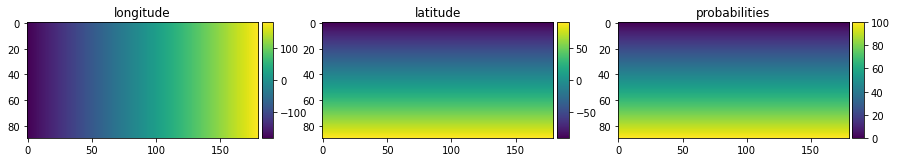

In [54]:
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import make_axes_locatable

nlon, nlat = (180, 90)
lon = np.linspace(-180, 180, nlon)
lat = np.linspace(-90, 90, nlat)
lonv, latv = np.meshgrid(lon, lat, indexing='ij')
probs = 100*(latv - latv.min())/(latv.max() - latv.min())

fig = plt.figure(figsize=(15, 5))
for i, (name, matrix) in enumerate({'longitude': lonv, 'latitude': latv, 'probabilities': probs}.items()):
    ax = fig.add_subplot(1, 3, i+1)
    ax.set_title(name)
    img = ax.imshow(matrix.T)
    divider = make_axes_locatable(ax)
    cax = divider.append_axes("right", size="5%", pad=0.05)
    fig.colorbar(img, cax=cax)

If we show the probability of North it seems that the probability of South has an alpha transparency of 1.0. Making it difficult to see the South (yellow) predictions.

In [55]:
from ipyleaflet import Map, Heatmap
from random import uniform
m = Map(center=(0, 0), zoom=0)

nlon, nlat = (180, 90)
lon = np.linspace(-180, 180, nlon)
lat = np.linspace(-90, 90, nlat)
lonv, latv = np.meshgrid(lon, lat, indexing='ij')
probs = 100*(latv - latv.min())/(latv.max() - latv.min())

heatmap = Heatmap(
    locations=[[latv[i,j], lonv[i,j], probs[i,j]] for i in range(nlon) for j in range(nlat)],
    radius=20,
    gradient={0.0: 'yellow', 0.5: 'green', 1.0: 'blue'}
)

m.add_layer(heatmap);
display(m)

Map(center=[0, 0], controls=(ZoomControl(options=['position', 'zoom_in_text', 'zoom_in_title', 'zoom_out_text'…

In [56]:
m = Map(center=(0, 0), zoom=0)

probs_s = 100 - probs

heatmap = Heatmap(
    locations=[[latv[i,j], lonv[i,j], probs_s[i,j]] for i in range(nlon) for j in range(nlat)],
    radius=20,
    gradient={0.0: 'blue', 0.5: 'green', 1.0: 'yellow'}
)

m.add_layer(heatmap);
display(m)

Map(center=[0, 0], controls=(ZoomControl(options=['position', 'zoom_in_text', 'zoom_in_title', 'zoom_out_text'…

It is necessary to show the probability of both classes in separate layers, given that the probabilities near 0 have the alpha channel to 1 and are not visible. 

In [57]:
from ipyleaflet import Map, Heatmap
from random import uniform
m = Map(center=(0, 0), zoom=0)


nlon, nlat = (180, 90)
lon = np.linspace(-180, 180, nlon)
lat = np.linspace(-90, 90, nlat)
lonv, latv = np.meshgrid(lon, lat, indexing='ij')
probs = 100*(latv - latv.min())/(latv.max() - latv.min())

heatmap = Heatmap(
    locations=[[latv[i,j], lonv[i,j], probs[i,j]] for i in range(nlon) for j in range(nlat)],
    radius=20,
    gradient={0.0: 'yellow', 0.5: 'green', 1.0: 'blue'}
)

m.add_layer(heatmap);

probs = 100 - probs

heatmap = Heatmap(
    locations=[[latv[i,j], lonv[i,j], probs[i,j]] for i in range(nlon) for j in range(nlat)],
    radius=20,
    gradient={0.0: 'blue', 0.5: 'green', 1.0: 'yellow'}
)

m.add_layer(heatmap);
display(m)

Map(center=[0, 0], controls=(ZoomControl(options=['position', 'zoom_in_text', 'zoom_in_title', 'zoom_out_text'…

# Avoid projection deformation

In order to avoid the deformation of the grid from the sphere to the rectangle we can zoom into a smaller region of the map, as the deformation is less apparent. But the zoom and the heatmap still behave in a non-ideal way. It is very difficult to adjust a proper set of parameters for the heatmap to work with short and long zoom levels.

In [58]:
from ipyleaflet import Map, Heatmap
from random import uniform
m = Map(center=(55, 0), zoom=4.3)


nlon, nlat = (100, 100)
lon = np.linspace(-10, 10, nlon)
lat = np.linspace(50, 60, nlat)
lonv, latv = np.meshgrid(lon, lat, indexing='ij')
probs = 100*(latv - latv.min())/(latv.max() - latv.min())

color_per_class = [{0.0: 'yellow', 0.5: 'green', 1.0: 'blue'},
                   {0.0: 'blue', 0.5: 'green', 1.0: 'yellow'}]

for (gradient, values) in zip(*[color_per_class, [probs, 100 - probs]]):
    heatmap = Heatmap(
        locations=[[latv[i,j], lonv[i,j], values[i,j]] for i in range(nlon) for j in range(nlat)],
        radius=20,
        gradient=gradient
    )

    m.add_layer(heatmap);



## Example of linear classifier

In [59]:
display(m)

Map(center=[55, 0], controls=(ZoomControl(options=['position', 'zoom_in_text', 'zoom_in_title', 'zoom_out_text…

In [60]:
pip install requests

Note: you may need to restart the kernel to use updated packages.


# Country contours and Search Engine

The following is an example of country contours and the option to search for country names.

In [61]:
import json
import os
import requests

from ipyleaflet import AwesomeIcon, GeoJSON, Map, Marker, LayerGroup, SearchControl

m = Map(zoom=3, center=[19.1646, 72.8493])

if not os.path.exists('countries.geo.json'):
      url = 'https://raw.githubusercontent.com/jupyter-widgets/ipyleaflet/master/examples/countries.geo.json'
      r = requests.get(url)
      with open('countries.geo.json', 'w') as f:
        f.write(r.content.decode("utf-8"))

with open("countries.geo.json") as f:
    data = json.load(f)

countries = GeoJSON(data=data)

layer_group = LayerGroup(layers=(countries,))
marker = Marker(icon=AwesomeIcon(name="check", marker_color='green', icon_color='darkred'))

m.add_control(SearchControl(
  position="topleft",
  layer=layer_group,
  zoom=4,
  property_name='name',
  marker=marker
))

m

Map(center=[19.1646, 72.8493], controls=(ZoomControl(options=['position', 'zoom_in_text', 'zoom_in_title', 'zo…

In [62]:
from ipyleaflet import Map, ImageOverlay

m = Map(center=(25, -115), zoom=4)

image = ImageOverlay(
    #url="https://i.imgur.com/06Q1fSz.png",
    url="./06Q1fSz_alpha.png",
    #url='../06Q1fSz.png',
    bounds=((13, -130), (32, -100))
)

m.add_layer(image);
m

Map(center=[25, -115], controls=(ZoomControl(options=['position', 'zoom_in_text', 'zoom_in_title', 'zoom_out_t…

In [63]:
import ipyleaflet
import json
import pandas as pd
import os
import requests
from ipywidgets import link, FloatSlider
from branca.colormap import linear

def load_data(url, filename, file_type):
    r = requests.get(url)
    with open(filename, 'w') as f:
        f.write(r.content.decode("utf-8"))
    with open(filename, 'r') as f:
        return file_type(f)

geo_json_data = load_data(
    'https://raw.githubusercontent.com/jupyter-widgets/ipyleaflet/master/examples/us-states.json',
    'us-states.json',
     json.load)

unemployment = load_data(
    'https://raw.githubusercontent.com/jupyter-widgets/ipyleaflet/master/examples/US_Unemployment_Oct2012.csv',
    'US_Unemployment_Oct2012.csv',
     pd.read_csv)

unemployment =  dict(zip(unemployment['State'].tolist(), unemployment['Unemployment'].tolist()))

layer = ipyleaflet.Choropleth(
    geo_data=geo_json_data,
    choro_data=unemployment,
    colormap=linear.YlOrRd_04,
    border_color='black',
    style={'fillOpacity': 0.8, 'dashArray': '5, 5'})

m = ipyleaflet.Map(center = (43,-100), zoom = 4)
m.add_layer(layer)
m

Map(center=[43, -100], controls=(ZoomControl(options=['position', 'zoom_in_text', 'zoom_in_title', 'zoom_out_t…

The two coordinates in the map are

- longitude : [-180, 180] (West of the map, East of the map)
- latitude : [-90, 90] (South pole, North pole)

Altough while writing or speaking it is more common to use only positive values, and indicate West as a negative longitude and South as a negative latitude.
The longitude zero corresponds to the prime meridian which crosses Greenwich, while the latitude zero corresponds to the equator line. The Null island is in the intersection of these two lines (0N, 0E) in hte Gulf of Guinea which depicts a weather buoy maintained by PIRATA (Prediction and Research Moored Array in the Atlantic).

The coordinates are always specified as latitude first and longitude second, eg. Bristol center is 51.4545° N, 2.5879° W

In [64]:
import ipyleaflet
import json
import pandas as pd
import os
import requests
from ipywidgets import link, FloatSlider
from branca.colormap import linear

regions = {
    "type": "FeatureCollection",
    "features":[{
        "type":"Feature",
        "id":"YS",
        "properties":{"name":"Yellow Square"},
        "geometry":{
            "type":"Polygon",
            "coordinates": [[[-2,2],
                             [-2,-2],
                             [2,-2],
                             [2,2]]]
        }
    },
    {
        "type":"Feature",
        "id":"RS",
        "properties":{"name":"Red Square"},
        "geometry":{
            "type":"Polygon",
            "coordinates": [[[2,2],
                             [8,2],
                             [8,8],
                             [2,8]]]
        }
    }]
}

colors = {'YS': 0, 'RS': 1}

layer = ipyleaflet.Choropleth(
    geo_data=regions,
    choro_data=colors,
    colormap=linear.YlOrRd_04,
    border_color='black',
    style={'fillOpacity': 0.7, 'dashArray': '5, 5'})

m = ipyleaflet.Map(center = (0,0), zoom = 4)
m.add_layer(layer)
m

Map(center=[0, 0], controls=(ZoomControl(options=['position', 'zoom_in_text', 'zoom_in_title', 'zoom_out_text'…

# Classification problem

First we will generate a synthethic dataset

In [65]:
spain_center = (40.4637, -3.7492) # latitude longitude (+N, +E) or (-S, -W)
france_center = (46.2276, 2.2137) # latitude, longitude
andorra_center = (42.5063, 1.5218) # 

def latlong_to_xy(coordinates):
    ''' Convert coordinates from X,Y space into latitude and longitude'''
    if len(coordinates) > 0 and (type(coordinates[0]) not in [float, int]):
        return [list(reversed(ll)) for ll in coordinates]
    return list(reversed(coordinates))

def xy_to_latlong(coordinates):
    ''' Convert coordinates from latitude longitude space into X,Y space'''
    return latlong_to_xy(coordinates)

# Example with two Gaussians

In [66]:
# Two Gaussians
samples_c0 = 500
samples_c1 = 500
x_class_0 = np.random.multivariate_normal(mean=spain_center, cov=[[12,0],[0,12]], size=samples_c0)
x_class_1 = np.random.multivariate_normal(mean=france_center, cov=[[12,0],[0,12]], size=samples_c1)
y_class_0 = np.zeros((samples_c0, 1), dtype=int)
y_class_1 = np.ones((samples_c1, 1), dtype=int)

x = np.vstack((x_class_0, x_class_1))
y = np.vstack((y_class_0, y_class_1)).squeeze()

from sklearn.utils import shuffle

x, y = shuffle(x, y)

# Example with 2 clusters per class

In [67]:
from sklearn.datasets import make_classification

# FIXME Clarify the coordinates (x1, x2) and (lat, long)
x, y = make_classification(n_samples=1000, n_features=2,
                           n_informative=2, n_redundant=0,
                           n_classes=2, n_clusters_per_class=2,
                           flip_y=0.2, scale=(6, 1),
                           shift=andorra_center,
                           random_state=0)

# Multiple blobs per class

In [68]:
from sklearn.datasets import make_blobs

x, y = make_blobs(n_samples=500, n_features=2, centers=20,
                  cluster_std=2.0, center_box=(-20.0, 20.0),
                  shuffle=True, random_state=42)

x += andorra_center

y[y<10] = 0
y[y>=10] = 1

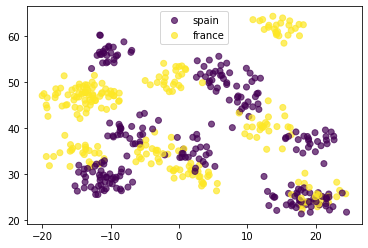

In [69]:
fig, ax = plt.subplots(1)
scatter = ax.scatter(x[:,1], x[:,0], c=y, alpha=0.7)
ax.legend(handles=scatter.legend_elements(num=[0,1])[0], labels=['spain', 'france'])

In [70]:
locations_c0 = np.hstack((x[y==0], np.ones((sum(y==0), 1))))
locations_c1 = np.hstack((x[y==1], np.ones((sum(y==1), 1))))

In [71]:
from ipyleaflet import Map, basemaps, basemap_to_tiles, Circle
m = Map(center=andorra_center, zoom=4)

class_color = ['blue', 'yellow']
# FIXME One layer per circle gets laggy, we show only 100 points
for sample_x, sample_y in zip(x[:100].tolist(), y[:100]):
    circle = Circle()
    circle.location = sample_x
    circle.radius = 100
    circle.color = class_color[sample_y]
    circle.fill_color = class_color[sample_y]

    m.add_layer(circle)
display(m)

Map(center=[42.5063, 1.5218], controls=(ZoomControl(options=['position', 'zoom_in_text', 'zoom_in_title', 'zoo…

In [72]:
m = Map(center=(40.4637, -3.7492), zoom=4)

for color, location in [('blue', locations_c0.tolist()),
                        ('yellow', locations_c1.tolist())]:
    heatmap = Heatmap(
        locations=location,
        radius=5,
        gradient={0.0: color, 1.0: color},
        min_opacity=1,
    )

    m.add_layer(heatmap);

display(m)

Map(center=[40.4637, -3.7492], controls=(ZoomControl(options=['position', 'zoom_in_text', 'zoom_in_title', 'zo…

We train a Logistic Regression to discriminate the two classes

In [73]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

#clf = LogisticRegression()
#clf = RandomForestClassifier()
clf = SVC(C=10000, probability=True)
clf.fit(x, y)

print('Training accuracy = {:.3f}'.format(np.mean(clf.predict(x) == y)))

Training accuracy = 0.848


And next we see the probabilities given in a large region around both classes

In [74]:
nlon, nlat = (200, 200)
lon = np.linspace(-180, 180, nlon)
lat = np.linspace(-90, 90, nlat)
lonv, latv = np.meshgrid(lon, lat, indexing='ij')
center = andorra_center

# FIXME Use the predicted probabilities
probs = clf.predict_proba(np.hstack((latv.reshape(-1,1), lonv.reshape(-1,1))))
#probs = np.log((center -np.hstack((lonv.reshape(-1, 1), latv.reshape(-1,1))))**2)/100
#probs = np.hstack((probs, -1*probs))


m = Map(center=center, zoom=4)

for c, gradient in enumerate([{0.0: 'blue', 1.0: 'blue'},
                              {0.0: 'yellow', 1.0: 'yellow'}]):
    location_prob_c = probs[:,c].reshape(lonv.shape)*100 # FIXME If I select a value between 0 and 1, the color is barely visible

    heatmap = Heatmap(
        locations=[[latv[i,j], lonv[i,j], location_prob_c[i,j]] for i in range(nlon) for j in range(nlat)],
        radius=40,
        gradient=gradient,
        min_opacity=0.0,
    )

    m.add_layer(heatmap);


display(m)

Map(center=[42.5063, 1.5218], controls=(ZoomControl(options=['position', 'zoom_in_text', 'zoom_in_title', 'zoo…

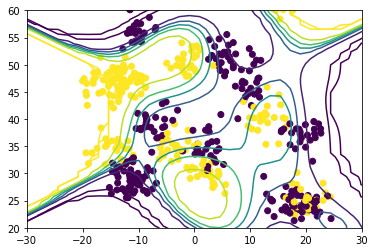

In [75]:
# Another option for interactive plots
#import mpld3
#mpld3.enable_notebook()
# We need to invert x1 and x2 given that latitude and longitude are in the oposite order than xy space
plt.scatter(x[:,1], x[:,0], c=y)
cs = plt.contour(lonv, latv, probs[:,1].reshape(lonv.shape),
                 [0, 0.000001, 0.0001, 0.1, 0.3, 0.5,
                  0.7, 0.9, 0.9999, 0.999999, 1])
plt.xlim([-30, 30])
plt.ylim([20, 60])
plt.show()
#cs.collections[0].get_paths()

(20.0, 60.0)

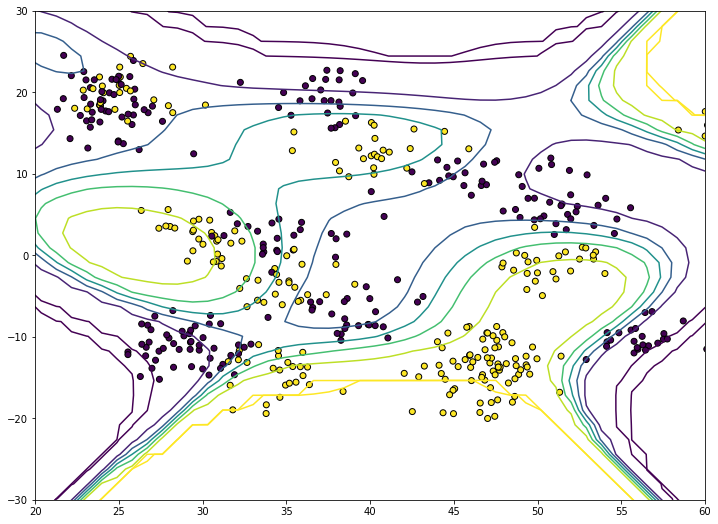

In [76]:
# Obtain the contour lines for the latitude and longitude variant
fig, ax = plt.subplots(1, figsize=(12, 9))
cs = ax.contour(latv, lonv, probs[:,1].reshape(lonv.shape),
                 [0, 0.000001, 0.0001, 0.1, 0.3, 0.5,
                  0.7, 0.9, 0.9999, 0.999999, 1]);
ax.scatter(x[:,0], x[:,1], c=y, edgecolor='black')
ax.set_ylim([-30, 30])
ax.set_xlim([20, 60])

In [77]:
from ipyleaflet import Map, Polyline

m = Map(center=andorra_center, zoom=5)

# FIXME The current code only uses one of the lines for each level (see p.get_paths()[0])
lines = [p.get_paths()[0].vertices.tolist() for p in cs.collections if p.get_paths()]
colors = [linear.viridis(i/len(lines)) for i in range(len(lines))]

for (line, color) in zip(lines, colors):
    l_layer = Polyline(
        locations=line,
            color=color,
            fill=False
        )
    m.add_layer(l_layer)

m

Map(center=[42.5063, 1.5218], controls=(ZoomControl(options=['position', 'zoom_in_text', 'zoom_in_title', 'zoo…

In [78]:
regions = {
    "type": "FeatureCollection",
    "features":[]
}

colors = {str(i): i/(len(lines)-1) for i in range(len(lines)-1)}

# TODO Why do I need to invert latitude and longitude in the polygons?
lines_rev = [[list(reversed(point)) for point in line] for line in lines]

for i in range(len(lines_rev) - 1):
    # FIXME This method uses the first line of two consecutive levels to create a closed shape.
    #       This works for a linear classifier, but needs to be generalised to models with multiple lines
    #       at the same level.
    l1 = lines_rev[i]
    l2 = lines_rev[i+1]
    polygon = np.concatenate((l1, list(reversed(l2)))).tolist()
    regions["features"].append({
            "type":"Feature",
            "id":str(i),
            "properties":{"name":"Yellow Square"},
            "geometry":{
                "type":"Polygon",
                "coordinates": [polygon]
            }
        })

layer = ipyleaflet.Choropleth(
    geo_data=regions,
    choro_data=colors,
    colormap=linear.viridis,
    border_color='black',
    style={'fillOpacity': 0.5, 'dashArray': '5, 5'})

m = Map(center=andorra_center, zoom=5)
m.add_layer(layer)
m

Map(center=[42.5063, 1.5218], controls=(ZoomControl(options=['position', 'zoom_in_text', 'zoom_in_title', 'zoo…

(20.0, 60.0)

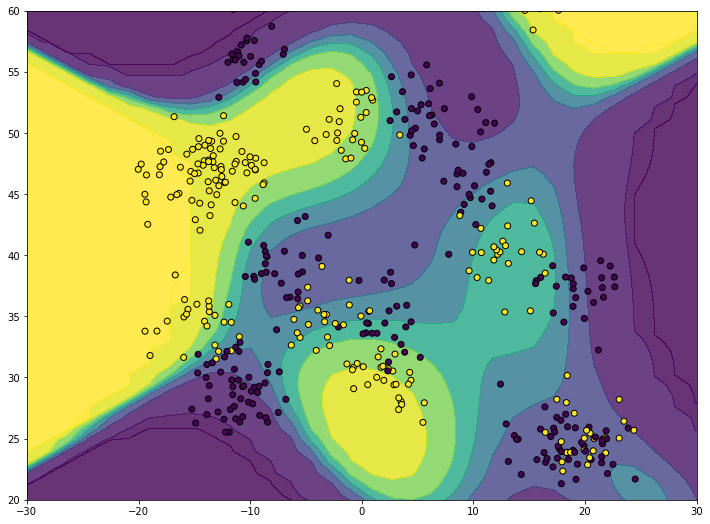

In [79]:
# Another option for interactive plots
import mpld3
mpld3.enable_notebook()
fig, ax = plt.subplots(1, figsize=(12, 9))
cs = ax.contourf(lonv, latv, probs[:,1].reshape(lonv.shape),
                 [0, 0.000001, 0.0001, 0.1, 0.3, 0.5,
                  0.7, 0.9, 0.9999, 0.999999, 1], alpha=0.8)
ax.scatter(x[:,1], x[:,0], c=y, edgecolor='black')
ax.set_xlim([-30, 30])
ax.set_ylim([20, 60])

In [80]:
regions = {
    "type": "FeatureCollection",
    "features":[]
}


contour_list = []
for collection in cs.collections:
    contour_list.append([])
    paths_list = collection.get_paths()
    for path in paths_list:
        contour_list[-1].append(path.vertices.tolist())

colors = {str(i): i/(len(contour_list)) for i in range(len(contour_list))}

# TODO It seems that polygons use the longitude first and latitude second

for i, polygon_list in enumerate(contour_list):
    for polygon in polygon_list:
        regions["features"].append({
                "type":"Feature",
                "id":str(i),
                "properties":{"name":"contours"},
                "geometry":{
                    "type":"Polygon",
                    "coordinates": [polygon]
                }
            })

layer = ipyleaflet.Choropleth(
    geo_data=regions,
    choro_data=colors,
    colormap=linear.viridis,
    border_color='black',
    style={'fillOpacity': 0.5, 'dashArray': '5, 5'})

m = Map(center=andorra_center, zoom=5)
m.add_layer(layer)
m

Map(center=[42.5063, 1.5218], controls=(ZoomControl(options=['position', 'zoom_in_text', 'zoom_in_title', 'zoo…